# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('../00_Data/df_complete.csv')

In [3]:
df.fillna(value = 0 ,  inplace = True)

In [4]:
df['release_date'] = pd.to_datetime(df.release_date)

### Describe
- '.describe()' returns me each columns Count , Mean , Std , Min, & Max

In [5]:
df.describe()

,total_album_tracks,danceability,energy,key,loudness,mode,speechiness,accousticness,instrumentalness,liveness,...,west coast rap,west coast trap,western swing,wonky,world,world worship,worship,wrestling,zapstep,zolo
count,85267.000000,85267.000000,85267.000000,85267.000000,85267.000000,85267.000000,85267.000000,85267.000000,85267.000000,85267.000000,...,85267.000000,85267.000000,85267.000000,85267.000000,85267.000000,85267.000000,85267.000000,85267.000000,85267.000000,85267.000000
mean,19.249499,0.560555,0.658129,5.237982,-8.245757,0.657910,0.130125,0.255447,0.108488,0.259434,...,0.008010,0.000481,0.000246,0.000117,0.000434,0.023151,0.042631,0.005805,0.000176,0.000129
std,14.544277,0.194039,0.235524,3.614798,5.595171,0.474412,0.162709,0.299780,0.275704,0.233421,...,0.089141,0.021923,0.015692,0.010829,0.020827,0.150383,0.202024,0.075971,0.013262,0.011357
min,1.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.446000,0.513000,2.000000,-9.408500,0.000000,0.037700,0.017900,0.000000,0.104000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,0.582000,0.698000,5.000000,-6.555000,1.000000,0.059700,0.116000,0.000002,0.158000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20.000000,0.705000,0.845000,8.000000,-4.919000,1.000000,0.155000,0.417000,0.001440,0.333000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,250.000000,0.988000,1.000000,11.000000,0.932000,1.000000,0.968000,0.996000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Track Number Count
- I wanted to plot this in order to view the distribution of the track numbers , and on average how many tracks are usually on an album.
- We can see that Tracks Numbers are most common to be within 1-12 and then decreasing dramatically after that

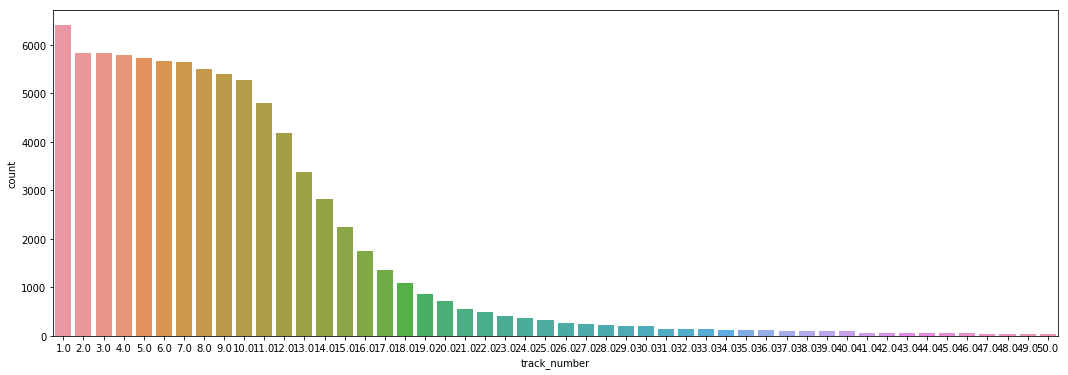

In [6]:
plt.figure(figsize = (18,6))
sns.countplot(df.track_number)

### Track Duration
- We can see that Track Duration for songs that won an award was roughly between 100 - 600 seconds with a peak around 200 seconds
- Viewing the scatter plot of the duration of a track and how many awards it won.
- There is a increase with songs winning more awards from 180 seconds to 300
- I can conclude from this that Having a song between 100-600 seconds is good but that optimizing for a song that ranges between 180-300 can increase the probability of winning more awards

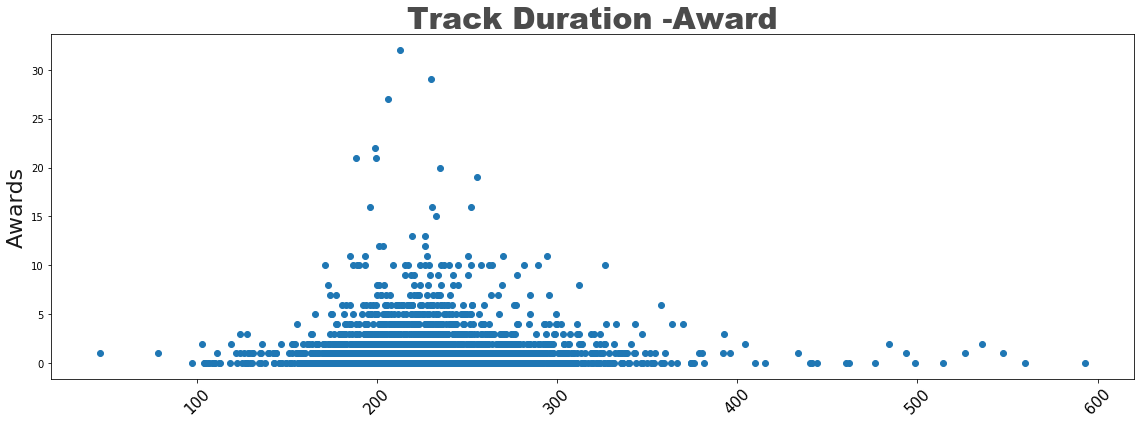

In [7]:
plt.figure(figsize = (16,6))
plt.title("Track Duration -Award" , fontsize = (30) , fontname = 'Arial Black' , alpha = .7)
locs, labels = plt.xticks(fontsize=15)
plt.setp(labels, rotation=45)
plt.scatter(df[df.award_binary ==1 ].duration , df[df.award_binary ==1].award)
plt.ylabel('Awards' , fontsize = (22) , alpha = .9)
plt.tight_layout();

## Track Number

- From This plot you can see that there is a decreasing slope in the number awards that are won and the track number
- Most awards that are won have earlier track numbers

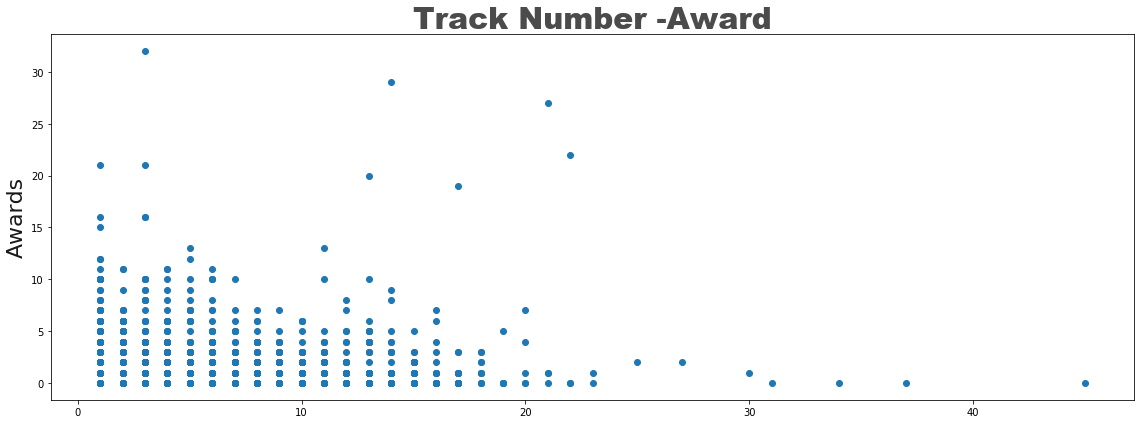

In [8]:
plt.figure(figsize = (16,6))
plt.title("Track Number -Award" , fontsize = (30) , fontname = 'Arial Black' , alpha = .7)
plt.scatter(df[df.award_binary ==1].track_number , df[df.award_binary ==1].award)
plt.ylabel('Awards' , fontsize = (22) , alpha = .9)
plt.tight_layout();

In [9]:
df_feat_no_genre = df[['release_date','track_id','track','artist','album','total_album_tracks','danceability','energy','key','loudness','mode',
    'speechiness','accousticness','instrumentalness','liveness','valence','tempo','time_signature','track_number'
                       ,'award_binary','duration','explicit', 'followers']]

### Correlation
- This is the correlationg of each audio feature compared with each ohter
- This shows the relationships between each feature and if they won an award or not, and also shows the relationship between the features themselves. 
- I can use this information for feature engineering

Text(0.5,1,'Correlation ')

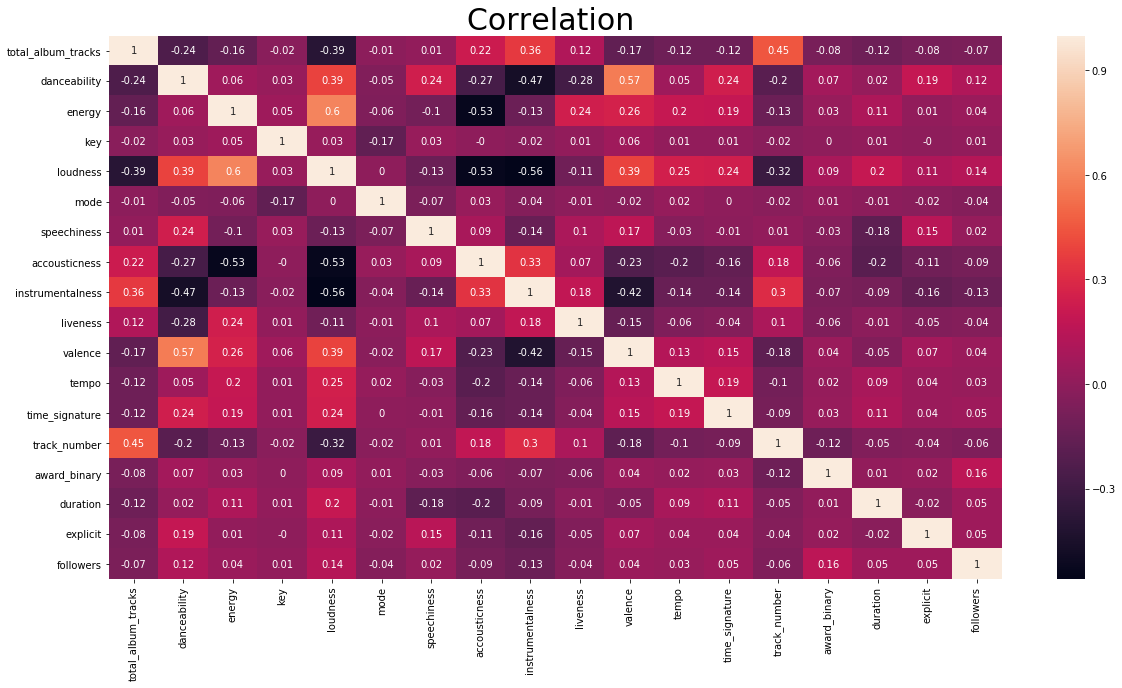

In [10]:
plt.figure(figsize= (20, 10))
sns.heatmap(round(df_feat_no_genre.corr(), 2), annot= True)
plt.title('Correlation ', fontsize= 30)

In [11]:
yearly_eda = df.set_index(df.release_date)

In [12]:
yearly_award_count= []
for i in range(2000,2019):
    yearly_award_count.append(yearly_eda[str(i)].award_binary.sum())

In [13]:
yearly_awards = pd.DataFrame(yearly_award_count , index = range(2000,2019) , columns = ['award_count'])

### Award Count
- This represents the count of each type of award
- Gold = 0
- Platinum = 1
- 2x Platinum = 2 
- etc.

Text(0,0.5,'# of Songs')

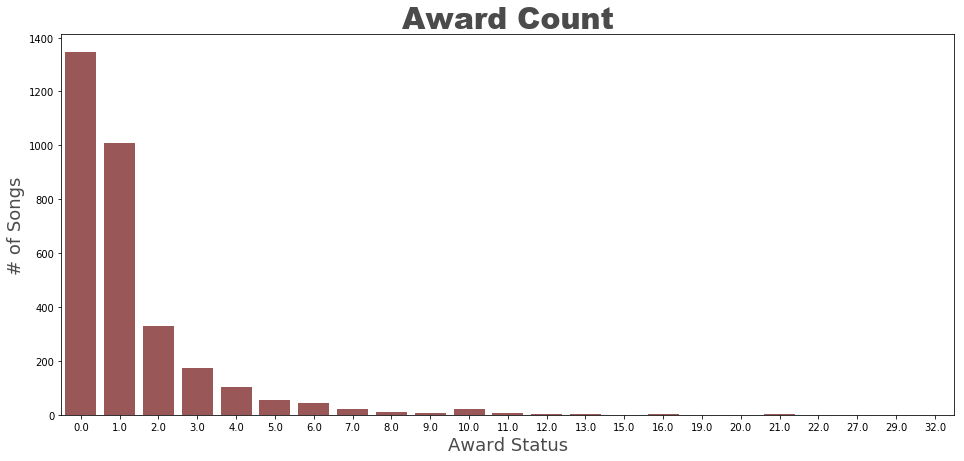

In [14]:
plt.figure(figsize = (16,7))
sns.countplot(df[df.award_binary==1].award ,  color = 'maroon' , alpha = .7  )
plt.title('Award Count'  , fontsize = (30) , fontname = 'Arial Black' , alpha = .7 )
plt.xlabel('Award Status' , fontsize = (18) , alpha = .7 )
plt.ylabel('# of Songs' , fontsize = (18) , alpha = .7 )

### Yearly Riaa Awards
- Each year a number of awards were given out to qualifying songs
- There is an increasing number of awards given out, my thoughts is because of the growing avaliability of music to consumers
- There is a dip in 2018 because the year is not over yet , & it takes a few months for a song to grow to an award status and be proccessed as one

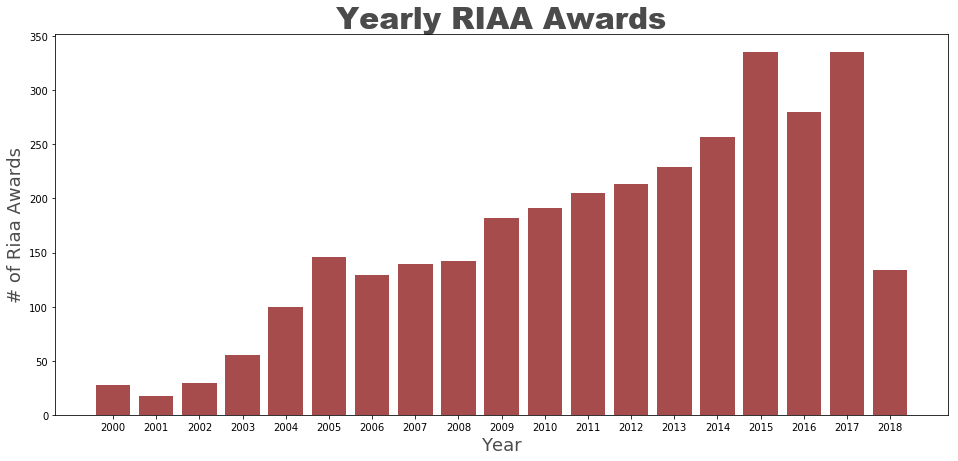

In [15]:
plt.figure(figsize = (16,7))
plt.bar(yearly_awards.index , yearly_awards.award_count , color = 'maroon' , alpha = .7 )
plt.ylabel('# of Riaa Awards' , fontsize = (18) , alpha = .7 )
plt.xlabel('Year',fontsize = (18) , alpha = .7 )
plt.title('Yearly RIAA Awards' , fontsize = (30) , fontname = 'Arial Black' , alpha = .7 )
plt.xticks([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015, 2016 , 2017 , 2018] );

In [16]:
top10_artist_follow = yearly_eda[['artist','followers']].sort_values('followers' , ascending = False).drop_duplicates().head(10)

In [84]:
top_10_riaa_artist = yearly_eda.groupby(['artist']).sum()[['award']].sort_values( 'award',ascending = False).head(10)

### Top 10 RIAA Artist
- I decided to plot this because I was debating on including the amount of followers that an artist had in my model becuase I didn't want that to be the strongest feature. 
- The first graph shows the top 10 artist that have won the most awards from the RIAA
- The Seconds graph shows the top 10 artist with the greatest amount of followers
- From these two graphs, although that there are some artist that are on both graphs, having more followers doesn't directly relate to how many awards an artist has won. 

- Various Artist represents a song that is owned by more than one artist. Many artist have collaberative albums where credits go to both individuals, so the 'various artist' column is represented by those album types.

Text(0.5,1,'Top 10 Artist Following')

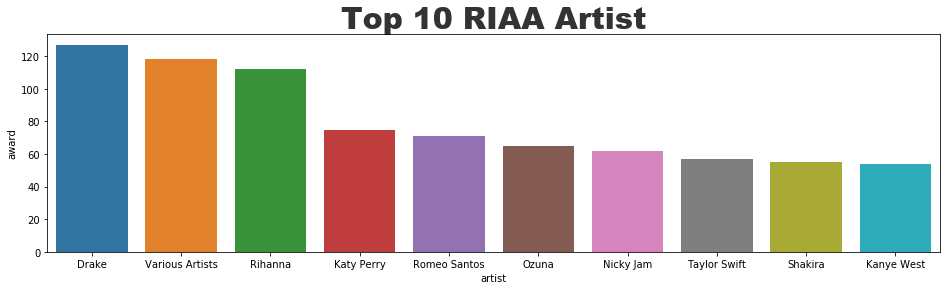

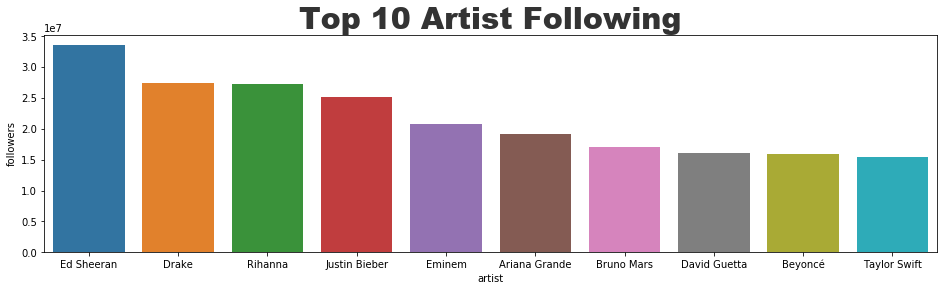

In [86]:
plt.figure(figsize = (16,4))
sns.barplot(top_10_riaa_artist.index , top_10_riaa_artist.award)
plt.title('Top 10 RIAA Artist' , fontsize = 30 , fontname = 'Arial Black', alpha = .8)


plt.figure(figsize = (16,4))
sns.barplot(top10_artist_follow.artist , top10_artist_follow.followers)
plt.title('Top 10 Artist Following' , fontsize = 30 , fontname = 'Arial Black', alpha = .8)